In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
df = pd.read_csv("../datasets/dex_dataset.csv")

#### Dataset Vizualization

In [12]:
malicious_count = len(df[df['is_malicious']==1])
benign_count = len(df[df['is_malicious']==0])

In [13]:
labels = ["Benign", "Malicious"]
frequency = [benign_count, malicious_count]

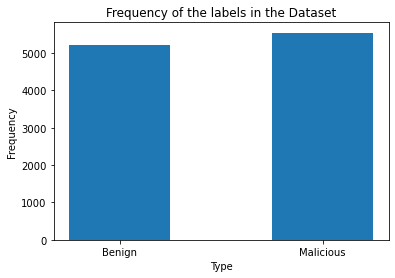

In [14]:
plt.bar(labels, frequency, width=0.5)
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.title("Frequency of the labels in the Dataset")
plt.show()

#### Data Split

In [15]:
from sklearn.utils import shuffle

df = shuffle(df, random_state=42)

X = df.drop(["Unnamed: 0", "id", "is_malicious"], axis=1)
y = df["is_malicious"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier()

In [17]:
params_rf = {
    "n_estimators": [100, 300, 500, 800, 1200],
    "max_depth": [5, 8, 15, 25, 30],
    "min_samples_split": [2, 5, 10, 15, 100],
    "min_samples_leaf": [1, 2, 5, 10]
}

#### Training

In [ ]:
rf = RandomizedSearchCV(rfclf, params_rf, cv=10, scoring="f1", n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

#### Results

In [19]:
rf_pred = rf.predict(X_test)

In [20]:
rf_score = f1_score(rf_pred, y_test)
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1033
           1       0.86      0.85      0.86      1123

    accuracy                           0.85      2156
   macro avg       0.85      0.85      0.85      2156
weighted avg       0.85      0.85      0.85      2156



## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier()

In [22]:
params_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 8, 15, 25, 30, 40, 50, 70, 90, 120, 150],
    "min_samples_split": [2, 5, 10, 15, 100],
    "min_samples_leaf": [1, 2, 5, 10]
}

#### Training

In [ ]:
dt = RandomizedSearchCV(dtclf, params_dt, cv=10, scoring="f1", n_jobs=-1, random_state=42)
dt.fit(X_train, y_train)

#### Results

In [24]:
dt_pred = dt.predict(X_test)

In [25]:
dt_score = f1_score(dt_pred, y_test)
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1047
           1       0.81      0.80      0.81      1109

    accuracy                           0.80      2156
   macro avg       0.80      0.80      0.80      2156
weighted avg       0.80      0.80      0.80      2156



## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knnclf = KNeighborsClassifier()

In [27]:
params_knn = {
    "n_neighbors": range(3,100,2)
}

#### Training

In [ ]:
knn = RandomizedSearchCV(knnclf, params_knn, cv=10, scoring="f1", n_jobs=-1, random_state=42)
knn.fit(X_train, y_train)

#### Results

In [29]:
knn_pred = knn.predict(X_test)

In [30]:
knn_score = f1_score(knn_pred, y_test)
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       961
           1       0.86      0.79      0.82      1195

    accuracy                           0.81      2156
   macro avg       0.81      0.81      0.81      2156
weighted avg       0.82      0.81      0.81      2156



## MLP

In [31]:
from sklearn.neural_network import MLPClassifier

mlpclf = MLPClassifier()

In [32]:
params_mlp = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#### Training

In [ ]:
mlp = RandomizedSearchCV(mlpclf, params_mlp, cv=10, scoring="f1", n_jobs=-1, random_state=42)
mlp.fit(X_train, y_train)

#### Results

In [34]:
mlp_pred = mlp.predict(X_test)

## SVC

In [36]:
from sklearn.svm import SVC

svclf = SVC()

In [37]:
params_svc = {
    "kernel": ["linear"],
    "gamma": [0.1, 1, 10],
    "C": [0.1, 1, 10],
    "degree": [0, 4]
}

#### Training

In [ ]:
svc = RandomizedSearchCV(svclf, params_svc, cv=3, scoring="f1", n_jobs=-1, random_state=42)
svc.fit(X_train, y_train)

#### Results

In [39]:
svc_pred = svc.predict(X_test)

In [40]:
svc_score = f1_score(svc_pred, y_test)
print(classification_report(svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       927
           1       0.84      0.75      0.79      1229

    accuracy                           0.78      2156
   macro avg       0.78      0.78      0.78      2156
weighted avg       0.78      0.78      0.78      2156



## Naive-Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB()

In [42]:
params_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

#### Training

In [ ]:
nb = RandomizedSearchCV(nbclf, params_nb, cv=10, scoring="f1", n_jobs=-1, random_state=42)
nb.fit(X_train, y_train)

#### Results

In [44]:
nb_pred = nb.predict(X_test)

In [45]:
nb_score = f1_score(nb_pred, y_test)
print(classification_report(nb_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.60      0.70      1488
           1       0.46      0.75      0.57       668

    accuracy                           0.65      2156
   macro avg       0.65      0.68      0.63      2156
weighted avg       0.72      0.65      0.66      2156



# Analysis

In [46]:
scores = [rf_score, dt_score, knn_score, mlp_score, svc_score, nb_score]
labels = ["RF", "DT", "KNN", "MLP", "SVC", "NB"]

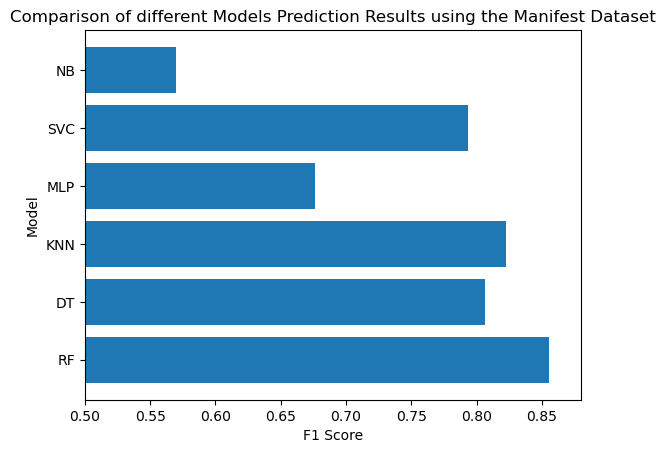

In [50]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(labels, scores)
plt.xlim([0.5, 0.88])
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.title("Comparison of different Models Prediction Results using the Manifest Dataset")
plt.show()

# Results

In [52]:
print("The best Classifier is Random Forest with an F1 score of %.2f" % rf_score)

The best Classifier is Random Forest with an F1 score of 0.86
